In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

import statsmodels.api as sm
from patsy import dmatrices
import random as rn

In [2]:
boston = pd.read_csv (r'E:\DSG Workspace\.ipynb_checkpoints\ISLR-python-master\Notebooks\Data\Boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
boston.shape

(506, 14)

In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
y,x=dmatrices('boston.crim~boston.zn')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.51e-06
Time:                        19:22:29   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.000       3.634       5.273
boston.zn     -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y,x=dmatrices('boston.crim~boston.indus')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.45e-21
Time:                        19:22:29   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.0637      0.667     -3.093      0.002      -3.375      -0.753
boston.indus     0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y,x=dmatrices('boston.crim~boston.chas')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Tue, 13 Apr 2021   Prob (F-statistic):              0.209
Time:                        19:22:29   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7444      0.396      9.453      0.000       2.966       4.523
boston.chas    -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y,x=dmatrices('boston.crim~boston.nox')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           3.75e-23
Time:                        19:22:29   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.000     -17.059     -10.381
boston.nox    31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y,x=dmatrices('boston.crim~boston.rm')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           6.35e-07
Time:                        19:22:29   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.000      13.872      27.092
boston.rm     -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
y,x=dmatrices('boston.crim~boston.age')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.85e-16
Time:                        19:22:29   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.000      -5.633      -1.923
boston.age     0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y,x=dmatrices('boston.crim~boston.dis')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           8.52e-19
Time:                        19:22:30   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.000       8.064      10.934
boston.dis    -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y,x=dmatrices('boston.crim~boston.rad')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.69e-56
Time:                        19:22:30   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.000      -3.158      -1.416
boston.rad     0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y,x=dmatrices('boston.crim~boston.tax')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.36e-47
Time:                        19:22:30   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.000     -10.131      -6.926
boston.tax     0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y,x=dmatrices('boston.crim~boston.ptratio')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.94e-11
Time:                        19:22:30   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.6469      3.147     -5.607      0.000     -23.830     -11.464
boston.ptratio     1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y,x=dmatrices('boston.crim~boston.black')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.49e-19
Time:                        19:22:30   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.5535      1.426     11.609      0.000      13.752      19.355
boston.black    -0.0363      0.004     -9.367      0.000      -0.044      -0.029
==============================================================================
Omnibus:                      594.029   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44041.935
Skew:                           5.578   Prob(JB):                         0.00
Kurtosis:                      47.323   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y,x=dmatrices('boston.crim~boston.lstat')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.65e-27
Time:                        19:22:30   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.3305      0.694     -4.801      0.000      -4.694      -1.968
boston.lstat     0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
y,x=dmatrices('boston.crim~boston.medv')
model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.17e-19
Time:                        19:22:30   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7965      0.934     12.628      0.000       9.961      13.632
boston.medv    -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
mod_all = smf.ols("crim~zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv",data=boston)
res_all = mod_all.fit()
print(res_all.summary())
                  
                  


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        19:22:30   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

In [19]:
print(res_all.params)

Intercept    17.033228
zn            0.044855
indus        -0.063855
chas         -0.749134
nox         -10.313535
rm            0.430131
age           0.001452
dis          -0.987176
rad           0.588209
tax          -0.003780
ptratio      -0.271081
black        -0.007538
lstat         0.126211
medv         -0.198887
dtype: float64


In [20]:
 t=np.array(res_all.params)
t=np.delete(t,0,0)
print(t)

[ 4.48552147e-02 -6.38548236e-02 -7.49133611e-01 -1.03135349e+01
  4.30130506e-01  1.45164344e-03 -9.87175726e-01  5.88208591e-01
 -3.78001638e-03 -2.71080558e-01 -7.53750489e-03  1.26211376e-01
 -1.98886821e-01]


In [21]:
k=np.array([-0.0739,0.5098,-1.8928,31.2485,-2.6841,0.1078,-1.5509,0.6179,0.0297,1.1520,-0.0363,0.5488,-0.3632])

Text(0, 0.5, 'multi-variate coefficients')

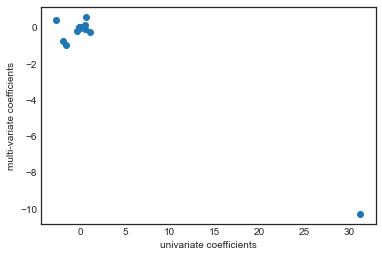

In [22]:
plt.scatter(k,t)
plt.xlabel("univariate coefficients")
plt.ylabel("multi-variate coefficients")

In [23]:
boston["zn2"]=boston.zn**2
boston["zn3"]=boston.zn**3
y,x=dmatrices('boston.crim~boston.zn+boston.zn2+boston.zn3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        19:22:31   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.000       3.995       5.697
boston.zn     -0.3322      0.110     -3.025      0.003      -0.548      -0.116
boston.zn2     0.0065      0.004      1.679      0.094      -0.001       0.014
boston.zn3 -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
boston["indus2"]=boston.indus**2
boston["indus3"]=boston.indus**3
y,x=dmatrices('boston.crim~boston.indus+boston.indus2+boston.indus3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.55e-32
Time:                        19:22:32   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6626      1.574      2.327      0.020       0.570       6.755
boston.indus     -1.9652      0.482     -4.077      0.000      -2.912      -1.018
boston.indus2     0.2519      0.039      6.407      0.000       0.175       0.329
boston.indus3    -0.0070      0.001     -7.292      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.788   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51742.286
Skew:                           5.820   Prob(JB):                         0.00
Kurtosis:                      51.153   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
boston["chas2"]=boston.chas**2
boston["chas3"]=boston.chas**3
y,x=dmatrices('boston.crim~boston.chas+boston.chas2+boston.chas3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Tue, 13 Apr 2021   Prob (F-statistic):              0.209
Time:                        19:22:32   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7444      0.396      9.453      0.000       2.966       4.523
boston.chas     -0.6309      0.502     -1.257      0.209      -1.617       0.355
boston.chas2    -0.6309      0.502     -1.257      0.209      -1.617       0.355
boston.chas3    -0.6309      0.502     -1.257      0.209      -1.617       0.355
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                     3.42e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
boston["nox2"]=boston.nox**2
boston["nox3"]=boston.nox**3
y,x=dmatrices('boston.crim~boston.nox+boston.nox2+boston.nox3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           3.81e-38
Time:                        19:22:32   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     233.0866     33.643      6.928      0.000     166.988     299.185
boston.nox  -1279.3713    170.397     -7.508      0.000   -1614.151    -944.591
boston.nox2  2248.5441    279.899      8.033      0.000    1698.626    2798.462
boston.nox3 -1245.7029    149.282     -8.345      0.000   -1538.997    -952.409
==============================================================================
Omnibus:                      614.412   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.997
Skew:                           5.851   Prob(JB):                         0.00
Kurtosis:                      52.008   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
boston["ptratio2"]=boston.ptratio**2
boston["ptratio3"]=boston.ptratio**3
y,x=dmatrices('boston.crim~boston.ptratio+boston.ptratio2+boston.ptratio3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.17e-13
Time:                        19:22:32   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         477.1840    156.795      3.043      0.002     169.129     785.239
boston.ptratio    -82.3605     27.644     -2.979      0.003    -136.673     -28.048
boston.ptratio2     4.6353      1.608      2.882      0.004       1.475       7.795
boston.ptratio3    -0.0848      0.031     -2.743      0.006      -0.145      -0.024
==============================================================================
Omnibus:                      572.356   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36070.763
Skew:                           5.294   Prob(JB):                         0.00
Kurtosis:                      42.985   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
boston["zn2"]=boston.zn**2
boston["zn3"]=boston.zn**3
y,x=dmatrices('boston.crim~boston.zn+boston.zn2+boston.zn3')

model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            boston.crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        19:22:32   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.000       3.995       5.697
boston.zn     -0.3322      0.110     -3.025      0.003      -0.548      -0.116
boston.zn2     0.0065      0.004      1.679      0.094      -0.001       0.014
boston.zn3 -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""